# Drug Classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1  :  Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("/workspaces/Drug-Classification/notebook/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target - Drug

# Step 2 : Basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Step 3 : Saperate X and Y(Drug)

In [7]:
X = df.drop(columns="Drug")
Y = df[["Drug"]]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


# Step 4 : Apply train_test_split

In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
169,20,F,HIGH,HIGH,11.262
97,56,F,HIGH,HIGH,25.395
31,74,M,HIGH,HIGH,9.567
12,43,M,LOW,HIGH,15.376
35,46,M,NORMAL,NORMAL,7.285


In [12]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [13]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


In [14]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


# Step 5 : Apply Preprocessing on X

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [16]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [17]:
cat

['Sex', 'BP', 'Cholesterol']

In [18]:
con

['Age', 'Na_to_K']

In [21]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [22]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [23]:
pre = ColumnTransformer(
    [
        ("con", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")
pre

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [25]:
X_pre_train = pre.fit_transform(xtrain)
X_pre_train.head()

,con__Age,con__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
169,-1.590463,-0.685430,0.0,0.0,0.0,0.0
97,0.625107,1.368661,0.0,0.0,0.0,0.0
31,1.732893,-0.931781,1.0,0.0,0.0,0.0
12,-0.174960,-0.087501,1.0,1.0,0.0,0.0
35,0.009671,-1.263447,1.0,0.0,1.0,1.0


In [26]:
X_pre_test = pre.transform(xtest)
X_pre_test.head()

,con__Age,con__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.605765,-0.661885,1.0,1.0,0.0,1.0
15,-1.836638,-0.067153,0.0,0.0,0.0,1.0
30,-1.713550,-1.050524,0.0,0.0,1.0,1.0
158,0.809738,-0.804318,0.0,1.0,0.0,0.0
128,0.071215,2.552746,1.0,1.0,0.0,1.0


# Step 6 : Model building

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_pre_train, ytrain)

KNeighborsClassifier(n_neighbors=50)

In [28]:
model.score(X_pre_train, ytrain)

0.65

In [29]:
model.score(X_pre_test, ytest)

0.7

In [30]:
params = {"n_neighbors" : [6, 7, 8, 9, 10, 11, 12]}
params

{'n_neighbors': [6, 7, 8, 9, 10, 11, 12]}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(model, params, cv=5, scoring="f1_macro", n_jobs=-1)
rscv.fit(X_pre_train, ytrain)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=50),
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [6, 7, 8, 9, 10, 11,
                                                        12]},
                   scoring='f1_macro')

In [32]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=9)

In [33]:
best_knn.score(X_pre_train, ytrain)

0.9285714285714286

In [34]:
best_knn.score(X_pre_test, ytest)

0.95

In [39]:
ytest_pred = best_knn.predict(X_pre_test)
ytest_pred[0:5]

array(['drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY'], dtype=object)

In [40]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [41]:
ytest_proba = best_knn.predict_proba(X_pre_test)
ytest_proba[0:5]

array([[0.11111111, 0.        , 0.        , 0.        , 0.88888889],
       [0.77777778, 0.22222222, 0.        , 0.        , 0.        ],
       [0.        , 0.22222222, 0.        , 0.        , 0.77777778],
       [0.33333333, 0.        , 0.22222222, 0.33333333, 0.11111111],
       [1.        , 0.        , 0.        , 0.        , 0.        ]])

# Step 7 : Model evaluation

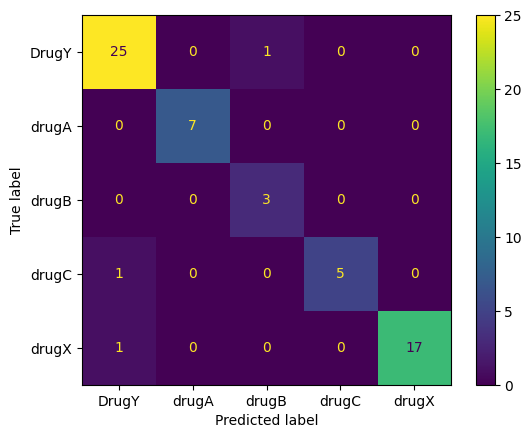

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ytest_pred)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

       DrugY       0.93      0.96      0.94        26
       drugA       1.00      1.00      1.00         7
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.83      0.91         6
       drugX       1.00      0.94      0.97        18

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.96      0.95      0.95        60



In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_knn, X_pre_train, ytrain, cv=5, scoring="f1_macro")
scores

array([0.91604396, 0.81952381, 0.68913043, 0.85212121, 0.9047619 ])

In [45]:
scores.mean()

np.float64(0.8363162634466981)

# Save the model object in joblib format

In [60]:
import joblib

In [61]:
joblib.dump(pre, "pre.joblib")
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [62]:
joblib.dump(best_knn, "model.joblib")
m = joblib.load("model.joblib")
m

KNeighborsClassifier(n_neighbors=9)

# Out of sample predictions

In [46]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [58]:
def predict_results(model, age, sex, bp, cholesterol, na_to_k):

    d = {
        "Age" : [age],
        "Sex" : [sex],
        "BP" : [bp],
        "Cholesterol" : [cholesterol],
        "Na_to_K" : [na_to_k]
    }

    xnew = pd.DataFrame(d)
    xnew = pre.transform(xnew)

    preds = model.predict(xnew)
    probs = model.predict_proba(xnew)

    classes = model.classes_

    prob_d = {}
    for c, p in zip(classes, probs.flatten()):
        prob_d[c] = float(p)

    return preds[0], prob_d

In [59]:
predict_results(best_knn, 41, "M", "LOW", "HIGH", 11.037)

('drugC',
 {'DrugY': 0.1111111111111111,
  'drugA': 0.2222222222222222,
  'drugB': 0.0,
  'drugC': 0.5555555555555556,
  'drugX': 0.1111111111111111})